In [64]:
using CairoMakie
using CSV
using DataFrames
using Flux
using MLJ

In [7]:
# datasets
train_path = "D:/EA4269_NorthernWoodlandCaribou/InputData/20220117_VRI_CleanUp/Train_Jan17.csv"
predict_path = "D:/EA4269_NorthernWoodlandCaribou/InputData/20220117_VRI_CleanUp/Predict_Jan17.csv";

In [31]:
t_df = CSV.read(train_path, DataFrame)
describe(t_df)

,variable,mean,min,median,max,nmissing
,Symbol,Union…,Any,Union…,Any,Int64
1,Year,2020.11,2015,2020.0,2021,0
2,Plot,,D1A C,,LBWQ25P5,0
3,Lat,55.8716,55.2645,55.7367,57.1079,0
4,Lon,-125.106,-126.84,-125.228,-124.102,0
5,Total_biomass_of_arboreal_liche,86.543,0.0,52.92,677.376,1
6,Total_biomass_terrestrial_liche,4877.06,0.0,429.625,49981.2,0
7,Total_Lichen__Combined_biomass_,4914.97,0.0,376.363,50037.2,1
8,Total_Lichen__Combined_biomass1,4.91497e5,0.0,37636.2,5.00372e6,1
9,FEATURE_ID,1.32127e7,3393082,1.36854e7,18018667,0


In [21]:
col_subset = [
    "Lat", "Lon", "Total_Lichen__Combined_biomass_", "SITE_POSITION_MESO",
    "SOIL_NUTRIENT_REGIME", "SHRUB_CROWN_CLOSURE", "HERB_COVER_PCT",
    "LAND_COVER_CLASS_CD_1", "SOIL_MOISTURE_REGIME_1", "CROWN_CLOSURE",
    "BASAL_AREA", "SPECIES_CD_1", "SPECIES_PCT_1", "ELE", "SLP", "TWI", "SOUTH"
]

t_df = t_df |>
d -> select(d, col_subset) |>
dropmissing

,Lat,Lon,Total_Lichen__Combined_biomass_,SITE_POSITION_MESO,SOIL_NUTRIENT_REGIME
,Float64,Float64,Float64,String1,String1
1,55.2708,-124.205,145.908,F,B
2,55.2704,-124.205,16.128,F,B
3,55.2701,-124.206,159.988,F,B
4,55.2707,-124.206,173.03,F,B
5,55.2702,-124.204,177.188,F,B
6,55.2645,-124.202,149.594,M,C
7,55.2649,-124.202,225.855,M,C
8,55.2654,-124.202,37.422,M,C
9,55.2648,-124.201,95.9175,M,C


In [28]:
describe(t_df)

,variable,mean,min,median,max,nmissing
,Symbol,Union…,Any,Union…,Any,Int64
1,Lat,55.8716,55.2645,55.7323,57.1079,0
2,Lon,-125.118,-126.84,-125.134,-124.13,0
3,Total_Lichen__Combined_biomass_,5554.9,0.0,532.25,50037.2,0
4,SITE_POSITION_MESO,,C,,U,0
5,SOIL_NUTRIENT_REGIME,,A,,C,0
6,SHRUB_CROWN_CLOSURE,16.5552,5,10.0,70,0
7,HERB_COVER_PCT,19.6402,3,10.0,88,0
8,LAND_COVER_CLASS_CD_1,,HE,,TM,0
9,SOIL_MOISTURE_REGIME_1,3.52691,1,4.0,7,0


In [22]:
schema(t_df)

┌─────────────────────────────────┬─────────┬────────────┐
│ _.names                         │ _.types │ _.scitypes │
├─────────────────────────────────┼─────────┼────────────┤
│ Lat                             │ Float64 │ Continuous │
│ Lon                             │ Float64 │ Continuous │
│ Total_Lichen__Combined_biomass_ │ Float64 │ Continuous │
│ SITE_POSITION_MESO              │ String1 │ Textual    │
│ SOIL_NUTRIENT_REGIME            │ String1 │ Textual    │
│ SHRUB_CROWN_CLOSURE             │ Int64   │ Count      │
│ HERB_COVER_PCT                  │ Int64   │ Count      │
│ LAND_COVER_CLASS_CD_1           │ String3 │ Textual    │
│ SOIL_MOISTURE_REGIME_1          │ Int64   │ Count      │
│ CROWN_CLOSURE                   │ Int64   │ Count      │
│ BASAL_AREA                      │ Float64 │ Continuous │
│ SPECIES_CD_1                    │ String3 │ Textual    │
│ SPECIES_PCT_1                   │ Float64 │ Continuous │
│ ELE                             │ Float64 │ Continuous

In [27]:
# fix scitypes
t_df_coerced = coerce(t_df, Count=>Continuous, Textual=>Multiclass)
t_df_coerced = coerce(t_df_coerced, :SOIL_MOISTURE_REGIME_1=>Multiclass)
schema(t_df_coerced)

┌─────────────────────────────────┬───────────────────────────────────┬─────────
│ _.names                         │ _.types                           │ _.scit ⋯
├─────────────────────────────────┼───────────────────────────────────┼─────────
│ Lat                             │ Float64                           │ Contin ⋯
│ Lon                             │ Float64                           │ Contin ⋯
│ Total_Lichen__Combined_biomass_ │ Float64                           │ Contin ⋯
│ SITE_POSITION_MESO              │ CategoricalValue{String1, UInt32} │ Multic ⋯
│ SOIL_NUTRIENT_REGIME            │ CategoricalValue{String1, UInt32} │ Multic ⋯
│ SHRUB_CROWN_CLOSURE             │ Float64                           │ Contin ⋯
│ HERB_COVER_PCT                  │ Float64                           │ Contin ⋯
│ LAND_COVER_CLASS_CD_1           │ CategoricalValue{String3, UInt32} │ Multic ⋯
│ SOIL_MOISTURE_REGIME_1          │ CategoricalValue{Float64, UInt32} │ Multic ⋯
│ CROWN_CLOSURE             

In [29]:
# Split predictors/responde variable
y, X = unpack(t_df_coerced, ==(:Total_Lichen__Combined_biomass_), _->true; rng=1010);

In [49]:
Xstd = MLJ.transform(fit!(machine(Standardizer(), X)), X)
Xohe = MLJ.transform(fit!(machine(OneHotEncoder(), Xstd)), Xstd);

┌ Info: Training Machine{Standardizer,…}.
└ @ MLJBase C:\Users\jnovoa\.julia\packages\MLJBase\QXObv\src\machines.jl:403
┌ Info: Training Machine{OneHotEncoder,…}.
└ @ MLJBase C:\Users\jnovoa\.julia\packages\MLJBase\QXObv\src\machines.jl:403
┌ Info: Spawning 6 sub-features to one-hot encode feature :SITE_POSITION_MESO.
└ @ MLJModels C:\Users\jnovoa\.julia\packages\MLJModels\GKDnU\src\builtins\Transformers.jl:1142
┌ Info: Spawning 3 sub-features to one-hot encode feature :SOIL_NUTRIENT_REGIME.
└ @ MLJModels C:\Users\jnovoa\.julia\packages\MLJModels\GKDnU\src\builtins\Transformers.jl:1142
┌ Info: Spawning 6 sub-features to one-hot encode feature :LAND_COVER_CLASS_CD_1.
└ @ MLJModels C:\Users\jnovoa\.julia\packages\MLJModels\GKDnU\src\builtins\Transformers.jl:1142
┌ Info: Spawning 7 sub-features to one-hot encode feature :SOIL_MOISTURE_REGIME_1.
└ @ MLJModels C:\Users\jnovoa\.julia\packages\MLJModels\GKDnU\src\builtins\Transformers.jl:1142
┌ Info: Spawning 7 sub-features to one-hot encode 

In [50]:
describe(Xohe)

,variable,mean,min,median,max,nmissing
,Symbol,Float64,Float64,Float64,Float64,Int64
1,Lat,-1.21464e-14,-1.31336,-0.301442,2.67439,0
2,Lon,4.31509e-14,-2.27548,-0.0205652,1.30577,0
3,SITE_POSITION_MESO__C,0.0283286,0.0,0.0,1.0,0
4,SITE_POSITION_MESO__F,0.206799,0.0,0.0,1.0,0
5,SITE_POSITION_MESO__L,0.0793201,0.0,0.0,1.0,0
6,SITE_POSITION_MESO__M,0.498584,0.0,0.0,1.0,0
7,SITE_POSITION_MESO__T,0.0538244,0.0,0.0,1.0,0
8,SITE_POSITION_MESO__U,0.133144,0.0,0.0,1.0,0
9,SOIL_NUTRIENT_REGIME__A,0.0708215,0.0,0.0,1.0,0


In [37]:
# Load a model and create a pipeline
model = @load NeuralNetworkRegressor pkg=MLJFlux
nnr = model()

import MLJFlux ✔
import MLJFlux ✔
import MLJFlux ✔
import MLJFlux ✔


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\jnovoa\.julia\packages\MLJModels\GKDnU\src\loading.jl:168
┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\jnovoa\.julia\packages\MLJModels\GKDnU\src\loading.jl:168
┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\jnovoa\.julia\packages\MLJModels\GKDnU\src\loading.jl:168
┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\jnovoa\.julia\packages\MLJModels\GKDnU\src\loading.jl:168


NeuralNetworkRegressor(
    builder = Linear(
            σ = NNlib.relu),
    optimiser = Flux.Optimise.ADAM(0.001, (0.9, 0.999), IdDict{Any, Any}()),
    loss = Flux.Losses.mse,
    epochs = 10,
    batch_size = 1,
    lambda = 0.0,
    alpha = 0.0,
    rng = Random._GLOBAL_RNG(),
    optimiser_changes_trigger_retraining = false,
    acceleration = CPU1{Nothing}(nothing))

In [51]:
mach = machine(nnr, Xohe, y) |> fit!

┌ Info: Training Machine{NeuralNetworkRegressor{Linear,…},…}.
└ @ MLJBase C:\Users\jnovoa\.julia\packages\MLJBase\QXObv\src\machines.jl:403
Optimising neural net: 18%[====>                    ]  ETA: 0:00:28

Optimising neural net: 82%[====================>    ]  ETA: 0:00:02

Optimising neural net: 91%[======================>  ]  ETA: 0:00:01

Optimising neural net:100%[=========================] Time: 0:00:08


Machine{NeuralNetworkRegressor{Linear,…},…} trained 1 time; caches data
  args: 
    1:	Source @512 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @234 ⏎ `AbstractVector{Continuous}`


In [58]:
# Increasing learning rate and adding iterations:
nnr.optimiser.eta = nnr.optimiser.eta * 2
nnr.epochs = nnr.epochs + 5

15

In [59]:
fit!(mach)

┌ Info: Updating Machine{NeuralNetworkRegressor{Linear,…},…}.
└ @ MLJBase C:\Users\jnovoa\.julia\packages\MLJBase\QXObv\src\machines.jl:404
Optimising neural net: 33%[========>                ]  ETA: 0:00:00

Optimising neural net: 50%[============>            ]  ETA: 0:00:00

Optimising neural net: 67%[================>        ]  ETA: 0:00:00

Optimising neural net: 83%[====================>    ]  ETA: 0:00:00

Optimising neural net:100%[=========================] Time: 0:00:00


Machine{NeuralNetworkRegressor{Linear,…},…} trained 2 times; caches data
  args: 
    1:	Source @512 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @234 ⏎ `AbstractVector{Continuous}`


In [74]:
training_loss = Flux.mse(predict(mach, Xohe), y) |> mean

1.3138722852601062e8

In [66]:
fitted_params(mach).chain

Chain(
  Dense(40, 1, relu),                   # 41 parameters
)

In [75]:
r = range(nnr, :epochs, lower=500, upper=1000, scale=:log10)
curve = learning_curve(nnr, Xohe, y,
                       range=r,
                       resampling=Holdout(fraction_train=0.7),
                       measure=Flux.mse)

┌ Info: Training Machine{DeterministicTunedModel{Grid,…},…}.
└ @ MLJBase C:\Users\jnovoa\.julia\packages\MLJBase\QXObv\src\machines.jl:403
┌ Info: Attempting to evaluate 30 models.
└ @ MLJTuning C:\Users\jnovoa\.julia\packages\MLJTuning\Al9yX\src\tuned_models.jl:680
Evaluating over 30 metamodels:   7%[=>                       ]  ETA: 0:06:35

Evaluating over 30 metamodels:  10%[==>                      ]  ETA: 0:04:18

Evaluating over 30 metamodels:  13%[===>                     ]  ETA: 0:03:11

Evaluating over 30 metamodels:  17%[====>                    ]  ETA: 0:02:30

Evaluating over 30 metamodels:  20%[=====>                   ]  ETA: 0:02:02

Evaluating over 30 metamodels:  23%[=====>                   ]  ETA: 0:01:43

Evaluating over 30 metamodels:  27%[======>                  ]  ETA: 0:01:28

Evaluating over 30 metamodels:  30%[=======>                 ]  ETA: 0:01:16

Evaluating over 30 metamodels:  33%[========>                ]  ETA: 0:01:07

Evaluating over 30 metamodels:  37%[=========>               ]  ETA: 0:00:59

Evaluating over 30 metamodels:  40%[==========>              ]  ETA: 0:00:53

Evaluating over 30 metamodels:  43%[==========>              ]  ETA: 0:00:47

Evaluating over 30 metamodels:  47%[===========>             ]  ETA: 0:00:42

Evaluating over 30 metamodels:  50%[============>            ]  ETA: 0:00:38

Evaluating over 30 metamodels:  53%[=============>           ]  ETA: 0:00:34

Evaluating over 30 metamodels:  57%[==============>          ]  ETA: 0:00:31

Evaluating over 30 metamodels:  60%[===============>         ]  ETA: 0:00:27

Evaluating over 30 metamodels:  63%[===============>         ]  ETA: 0:00:24

Evaluating over 30 metamodels:  67%[================>        ]  ETA: 0:00:22

Evaluating over 30 metamodels:  70%[=================>       ]  ETA: 0:00:19

Evaluating over 30 metamodels:  73%[==================>      ]  ETA: 0:00:17

Evaluating over 30 metamodels:  77%[===================>     ]  ETA: 0:00:14

Evaluating over 30 metamodels:  80%[====================>    ]  ETA: 0:00:12

Evaluating over 30 metamodels:  83%[====================>    ]  ETA: 0:00:10

Evaluating over 30 metamodels:  87%[=====================>   ]  ETA: 0:00:08

Evaluating over 30 metamodels:  90%[======================>  ]  ETA: 0:00:06

Evaluating over 30 metamodels:  93%[=======================> ]  ETA: 0:00:04

Evaluating over 30 metamodels:  97%[========================>]  ETA: 0:00:02

Evaluating over 30 metamodels: 100%[=========================] Time: 0:00:55


(parameter_name = "epochs",
 parameter_scale = :log10,
 parameter_values = [500, 512, 524, 537, 550, 563, 577, 591, 605, 620  …  806, 826, 846, 866, 887, 909, 931, 953, 976, 1000],
 measurements = [9.52228227725029e7, 9.507502750511436e7, 9.492784791087434e7, 9.476910182328668e7, 9.461107309138313e7, 9.445376378782994e7, 9.428515448697148e7, 9.411737185005507e7, 9.395041612574397e7, 9.377244999785303e7  …  9.16431517336055e7, 9.142251979538189e7, 9.120353257861239e7, 9.098611962134841e7, 9.07595520917961e7, 9.052403572934234e7, 9.029039535585377e7, 9.005862237589933e7, 8.98182928646992e7, 8.956967274760252e7],)

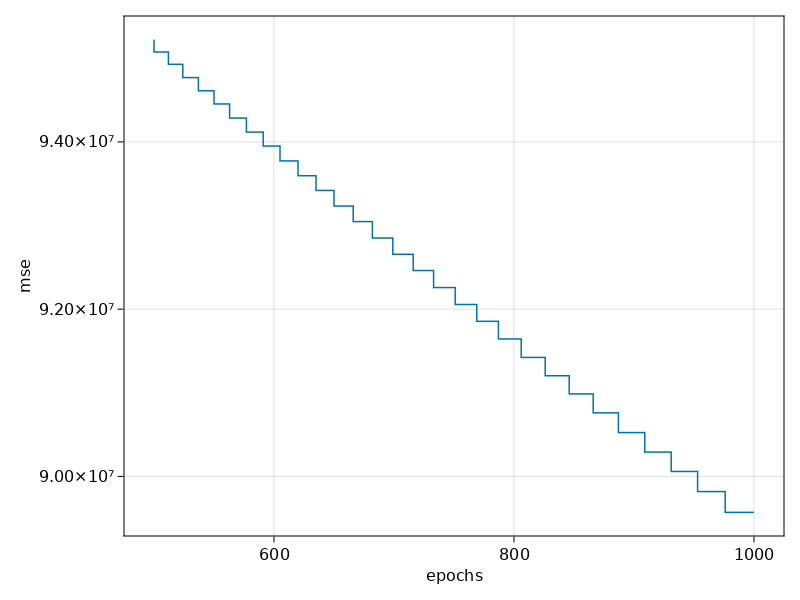

In [76]:
fig = Figure()
ax = Axis(fig[1, 1], xlabel="epochs", ylabel="mse")
stairs!(ax, curve.parameter_values, curve.measurements)
fig

In [77]:
training_loss = Flux.mse(predict(mach, Xohe), y) |> mean

1.3138722852601062e8